In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
stocks=pd.read_csv("../base/stocksV2.csv", sep=';',parse_dates=['date'], dayfirst=True)
stocks['date'] = pd.to_datetime(stocks['date'], format='%d/%m/%Y')


In [4]:
stocks.head()

,date,id_produit,entrepot,niveau_stock
0,2024-06-01,P00001,Lyon,88
1,2024-04-22,P00001,Paris,141
2,2024-09-25,P00002,Lyon,286
3,2024-02-18,P00003,Paris,177
4,2024-07-13,P00003,Lyon,95


In [5]:
stocks.shape,stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1706 entries, 0 to 1705
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1706 non-null   datetime64[ns]
 1   id_produit    1706 non-null   object        
 2   entrepot      1706 non-null   object        
 3   niveau_stock  1706 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 53.4+ KB


((1706, 4), None)

In [6]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1706 entries, 0 to 1705
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1706 non-null   datetime64[ns]
 1   id_produit    1706 non-null   object        
 2   entrepot      1706 non-null   object        
 3   niveau_stock  1706 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 53.4+ KB


In [7]:
stocks.isnull().sum()

date            0
id_produit      0
entrepot        0
niveau_stock    0
dtype: int64

In [8]:
# Check for duplicates
duplicates = stocks.duplicated()
print("Number of duplicates:", duplicates.sum())

Number of duplicates: 0


In [9]:
# Check for unique values in 'id_produit'
stocks["entrepot"].unique()

array(['Lyon', 'Paris', 'Marseille'], dtype=object)

**Interprétation :**
- la table **stocks** contient:
    *  4 variables: *date, id_produit, entrepôt,niveau_stock*
    * 30000 observations
- Aucune donnée manquante dans la table.
- **1000** produits différents dans la table.
- **3** entrepôts qui se trouvent à Paris, Lyon et Marseille.

In [10]:
stocks.head()

,date,id_produit,entrepot,niveau_stock
0,2024-06-01,P00001,Lyon,88
1,2024-04-22,P00001,Paris,141
2,2024-09-25,P00002,Lyon,286
3,2024-02-18,P00003,Paris,177
4,2024-07-13,P00003,Lyon,95


In [11]:

# Afficher les premières lignes des données
print(stocks.head())

# Vérifier les valeurs manquantes
print(stocks.isnull().sum())


# Vérifier les valeurs aberrantes
print(stocks['niveau_stock'].describe())

# Normaliser les formats de date
stocks['date'] = pd.to_datetime(stocks['date'])

# Sauvegarder les données nettoyées
stocks.to_csv('stock_nettoye.csv', index=False)


        date id_produit entrepot  niveau_stock
0 2024-06-01     P00001     Lyon            88
1 2024-04-22     P00001    Paris           141
2 2024-09-25     P00002     Lyon           286
3 2024-02-18     P00003    Paris           177
4 2024-07-13     P00003     Lyon            95
date            0
id_produit      0
entrepot        0
niveau_stock    0
dtype: int64
count    1706.000000
mean      148.587925
std        88.078076
min         0.000000
25%        72.000000
50%       147.500000
75%       226.000000
max       299.000000
Name: niveau_stock, dtype: float64


Moyenne du niveau de stock :  148.5879249706917
Médiane du niveau de stock :  147.5
Écart-type du niveau de stock :  88.07807557292647


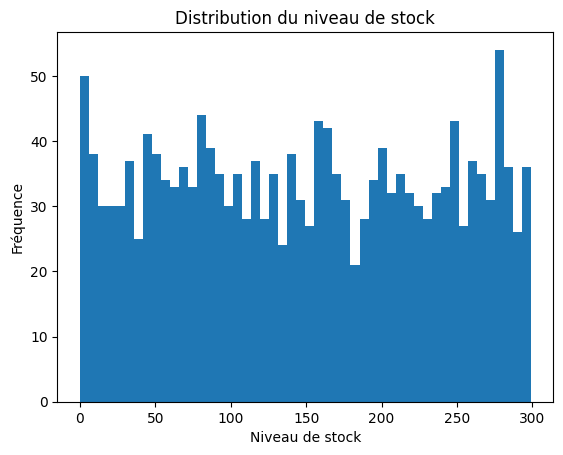

Nombre de produits par entrepôt :  entrepot
Lyon         576
Marseille    333
Paris        797
Name: id_produit, dtype: int64


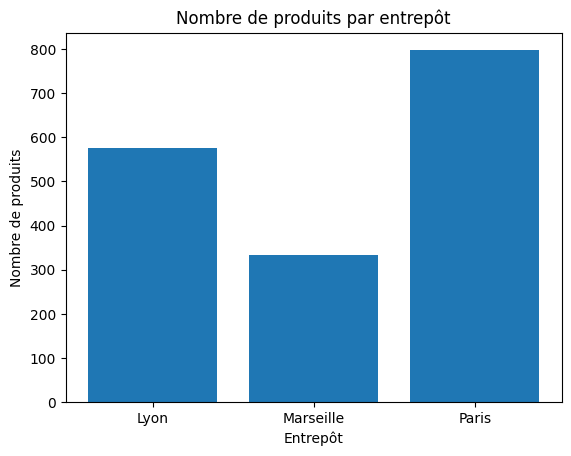

In [12]:

# Calculer les statistiques descriptives
moyenne_niveau_stock = stocks['niveau_stock'].mean()
mediane_niveau_stock = stocks['niveau_stock'].median()
ecart_type_niveau_stock = stocks['niveau_stock'].std()

print("Moyenne du niveau de stock : ", moyenne_niveau_stock)
print("Médiane du niveau de stock : ", mediane_niveau_stock)
print("Écart-type du niveau de stock : ", ecart_type_niveau_stock)

# Visualiser les données
plt.hist(stocks['niveau_stock'], bins=50)
plt.title('Distribution du niveau de stock')
plt.xlabel('Niveau de stock')
plt.ylabel('Fréquence')
plt.show()

# Calculer le nombre de produits par entrepôt
produits_par_entrepot = stocks.groupby('entrepot')['id_produit'].nunique()
print("Nombre de produits par entrepôt : ", produits_par_entrepot)

# Visualiser le nombre de produits par entrepôt
plt.bar(produits_par_entrepot.index, produits_par_entrepot.values)
plt.title('Nombre de produits par entrepôt')
plt.xlabel('Entrepôt')
plt.ylabel('Nombre de produits')
plt.show()